In [ ]:
pip install deepod

In [ ]:
!git clone https://github.com/xuhongzuo/DeepOD.git

In [ ]:
import os
os.chdir('DeepOD')

!pip install .

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# unsupervised methods
from deepod.models.tabular import DeepSVDD

# create a random np array with 101 samples and 5 features
X_train = np.random.rand(101,5)

# Set every 20th sample to all 0s.
# This is done to make it look as an anomaly.
X_train[20::20] = np.zeros(5)

# Train the linear classifier.
clf = DeepSVDD(device='cpu')
clf.fit(X_train, y=None)

Start Training...
ensemble size: 1
MLPnet(
  (network): Sequential(
    (0): LinearBlock(
      (linear): Linear(in_features=5, out_features=100, bias=False)
      (act_layer): ReLU()
    )
    (1): LinearBlock(
      (linear): Linear(in_features=100, out_features=50, bias=False)
      (act_layer): ReLU()
    )
    (2): LinearBlock(
      (linear): Linear(in_features=50, out_features=128, bias=False)
      (act_layer): Identity()
    )
  )
)
epoch  1, training loss: 0.577420, time: 0.0s
epoch 10, training loss: 0.136864, time: 0.0s
epoch 20, training loss: 0.120688, time: 0.0s
epoch 30, training loss: 0.093328, time: 0.0s
epoch 40, training loss: 0.097196, time: 0.0s
epoch 50, training loss: 0.086671, time: 0.0s
epoch 60, training loss: 0.098880, time: 0.0s
epoch 70, training loss: 0.084475, time: 0.0s
epoch 80, training loss: 0.087180, time: 0.0s
epoch 90, training loss: 0.089104, time: 0.0s
epoch100, training loss: 0.095840, time: 0.0s
Start Inference on the training data...


testing: 100%|██████████| 2/2 [00:00<00:00, 153.95it/s]


Here is the definition of the "decision scores" as defined in their documentation:

The outlier scores of the training data.
The higher, the more abnormal. Outliers tend to have higher
scores. This value is available once the detector is
fitted.

testing: 100%|██████████| 2/2 [00:00<00:00, 153.35it/s]


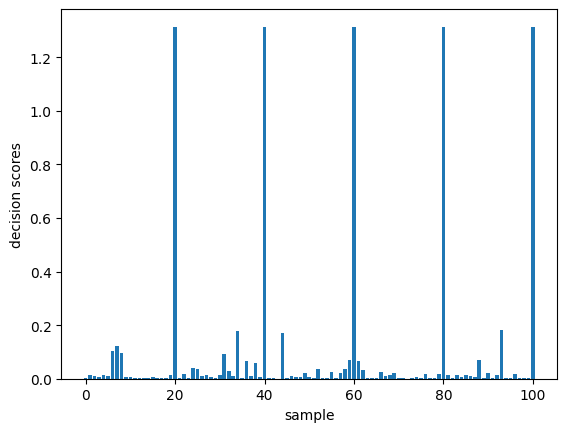

In [ ]:
scores = clf.decision_function(X_train)
plt.bar(range(len(scores)),scores)
plt.xlabel('sample')
plt.ylabel('decision scores')
plt.show()

In the plot above you can see that every 20th sample has a high anomaly score. This is as expected since we had masked (set to all 0s) every 20th sample.